**Abstract**: This data studies whether a person will accept the coupon recommended to him in different driving scenarios


This data(UCI Machine learning repository) was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver

**Attribute Information**

1. destination: No Urgent Place, Home, Work
2. passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
3. weather: Sunny, Rainy, Snowy
4. temperature:55, 80, 30
5. time: 2PM, 10AM, 6PM, 7AM, 10PM
6. coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
7. expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
8. gender: Female, Male
9. age: 21, 46, 26, 31, 41, 50plus, 36, below21
10. maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
11. has_Children:1, 0
12. education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
14. occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
15. income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
$50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
16. Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)
17. CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
18. CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)

19. RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than 20 every month?)
20. Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of 20 - 50 every month?)
13. toCoupon_GEQ5min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
21. toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
22. toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
23. direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
24. direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
25. Y:1, 0 (whether the coupon is accepted)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [99]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Vechicle coupon sales')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import io
data=pd.read_csv("in-vehicle-coupon-recommendation.csv",encoding="latin1")
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0


In [6]:
data1=data

In [7]:
data.shape

(12684, 26)

In [8]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 74


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [9]:
data.drop_duplicates(keep='first',inplace=True)

In [10]:
data.shape

(12610, 26)

In [11]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data

,column_name,percent_missing
destination,destination,0.000000
passanger,passanger,0.000000
weather,weather,0.000000
temperature,temperature,0.000000
time,time,0.000000
coupon,coupon,0.000000
expiration,expiration,0.000000
gender,gender,0.000000
age,age,0.000000
maritalStatus,maritalStatus,0.000000


In [13]:
# as the column'car' has the missing value 99% we are dropping the column from the data
data.drop(['car'],axis=1,inplace=True)

In [14]:
print(data['Restaurant20To50'].value_counts())
print(data['CarryAway'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['Bar'].value_counts())
print(data['RestaurantLessThan20'].value_counts()) 

less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: CarryAway, dtype: int64
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: CoffeeHouse, dtype: int64
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: Bar, dtype: int64
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: RestaurantLessThan20, dtype: int64


In [15]:
data['Restaurant20To50'].fillna('1~3',inplace=True)
data['RestaurantLessThan20'].fillna('less1',inplace=True)
data['Bar'].fillna('never',inplace=True)
data['CoffeeHouse'].fillna('less1',inplace=True)
data['CarryAway'].fillna('1~3',inplace=True)

In [16]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### As we are having small dataset imputing the missing value is very important otherwise we will losse the  information

1. Here i am imputed the missing value with highest frequency class n each column
2. other ways  of imputing missing values can be
   a. KNN
   b. Clustering 

#### Test of proportions - Chi square test

In [17]:
data2=data.drop(['Y'],axis=1)
data2.shape

(12610, 24)

In [18]:
from scipy.stats import chisquare
destination=chisquare(data2['destination'].value_counts())
direction_opp =chisquare(data2['direction_opp'].value_counts())
direction_same =chisquare(data2['direction_same'].value_counts())
toCoupon_GEQ25min=chisquare(data2['toCoupon_GEQ25min'].value_counts())
toCoupon_GEQ15min =chisquare(data2['toCoupon_GEQ15min'].value_counts())
toCoupon_GEQ5min =chisquare(data2['toCoupon_GEQ5min'].value_counts())
Restaurant20To50 =chisquare(data2['Restaurant20To50'].value_counts())
RestaurantLessThan20 =chisquare(data2['RestaurantLessThan20'].value_counts())
CarryAway =chisquare(data2['CarryAway'].value_counts())
CoffeeHouse =chisquare(data2['CoffeeHouse'].value_counts())
Bar =chisquare(data2['Bar'].value_counts())
income  =chisquare(data2['income'].value_counts())
occupation  =chisquare(data2['occupation'].value_counts())
education  =chisquare(data2['education'].value_counts())
has_children=chisquare(data2['has_children'].value_counts())
maritalStatus =chisquare(data2['maritalStatus'].value_counts())
age =chisquare(data2['age'].value_counts())
gender =chisquare(data2['gender'].value_counts())
expiration=chisquare(data2['expiration'].value_counts())
coupon=chisquare(data2['coupon'].value_counts())
time=chisquare(data2['time'].value_counts())
temperature =chisquare(data2['temperature'].value_counts())
weather =chisquare(data2['weather'].value_counts())
passanger =chisquare(data2['passanger'].value_counts())
destination=chisquare(data2['destination'].value_counts())

p_value=(destination[1],passanger[1],weather[1],temperature[1],time[1],coupon[1],expiration[1],gender[1],age[1],maritalStatus[1],has_children[1],education[1],occupation[1],income[1],Bar[1],CoffeeHouse[1],CarryAway[1],RestaurantLessThan20[1],Restaurant20To50[1],toCoupon_GEQ5min[1],toCoupon_GEQ15min[1],toCoupon_GEQ25min[1],direction_same[1],direction_opp[1])

test_of_proportions = pd.DataFrame({'column_name': data2.columns,'p-value': p_value})

test_of_proportions

,column_name,p-value
0,destination,0.000000e+00
1,passanger,0.000000e+00
2,weather,0.000000e+00
3,temperature,0.000000e+00
4,time,2.706551e-122
5,coupon,3.257865e-306
6,expiration,3.035763e-38
7,gender,3.490248e-03
8,age,0.000000e+00
9,maritalStatus,0.000000e+00


##### From the above result we can find that there is no equal proportions in the categorical variable

### so in this  dataset we have all categorical variable only, so the feature engineering plays a major role in this dataset

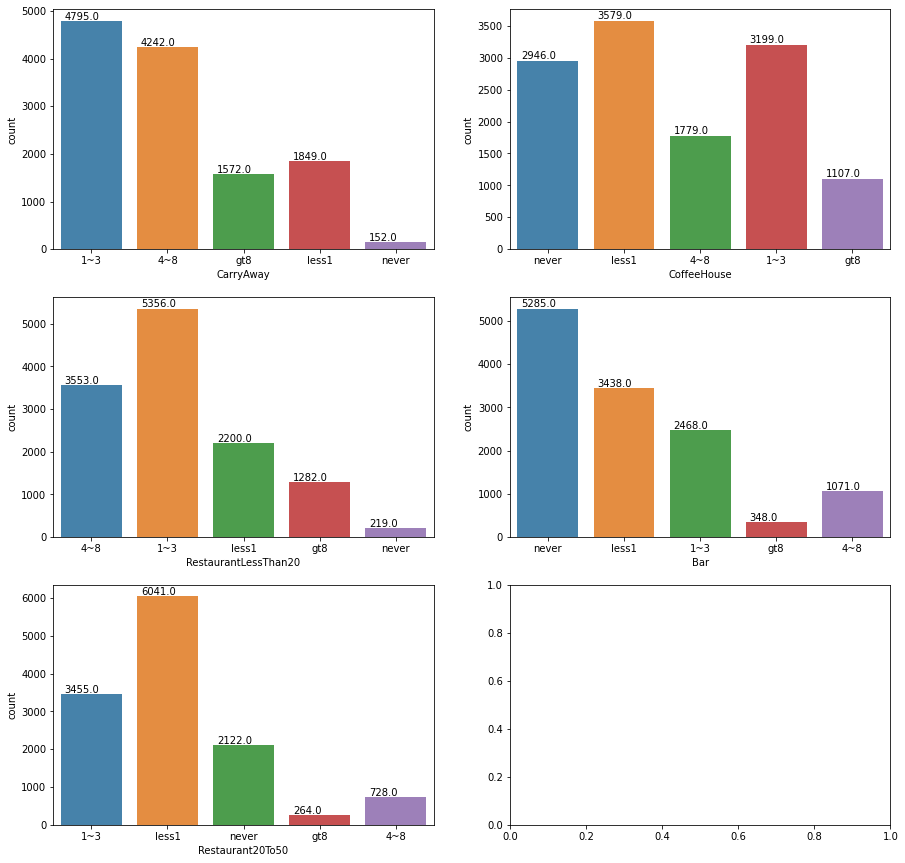

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)

a =sns.countplot(x="CarryAway", data=data,alpha=0.9, ax=axes[0][0])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a =sns.countplot(x="CoffeeHouse",data=data, alpha=0.9, ax=axes[0][1])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a =sns.countplot(x="RestaurantLessThan20",data=data,alpha=0.9, ax=axes[1][0])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a=sns.countplot(x="Bar",data=data, alpha=0.9, ax=axes[1][1])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a=sns.countplot(x="Restaurant20To50",data=data,alpha=0.9, ax=axes[2][0])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

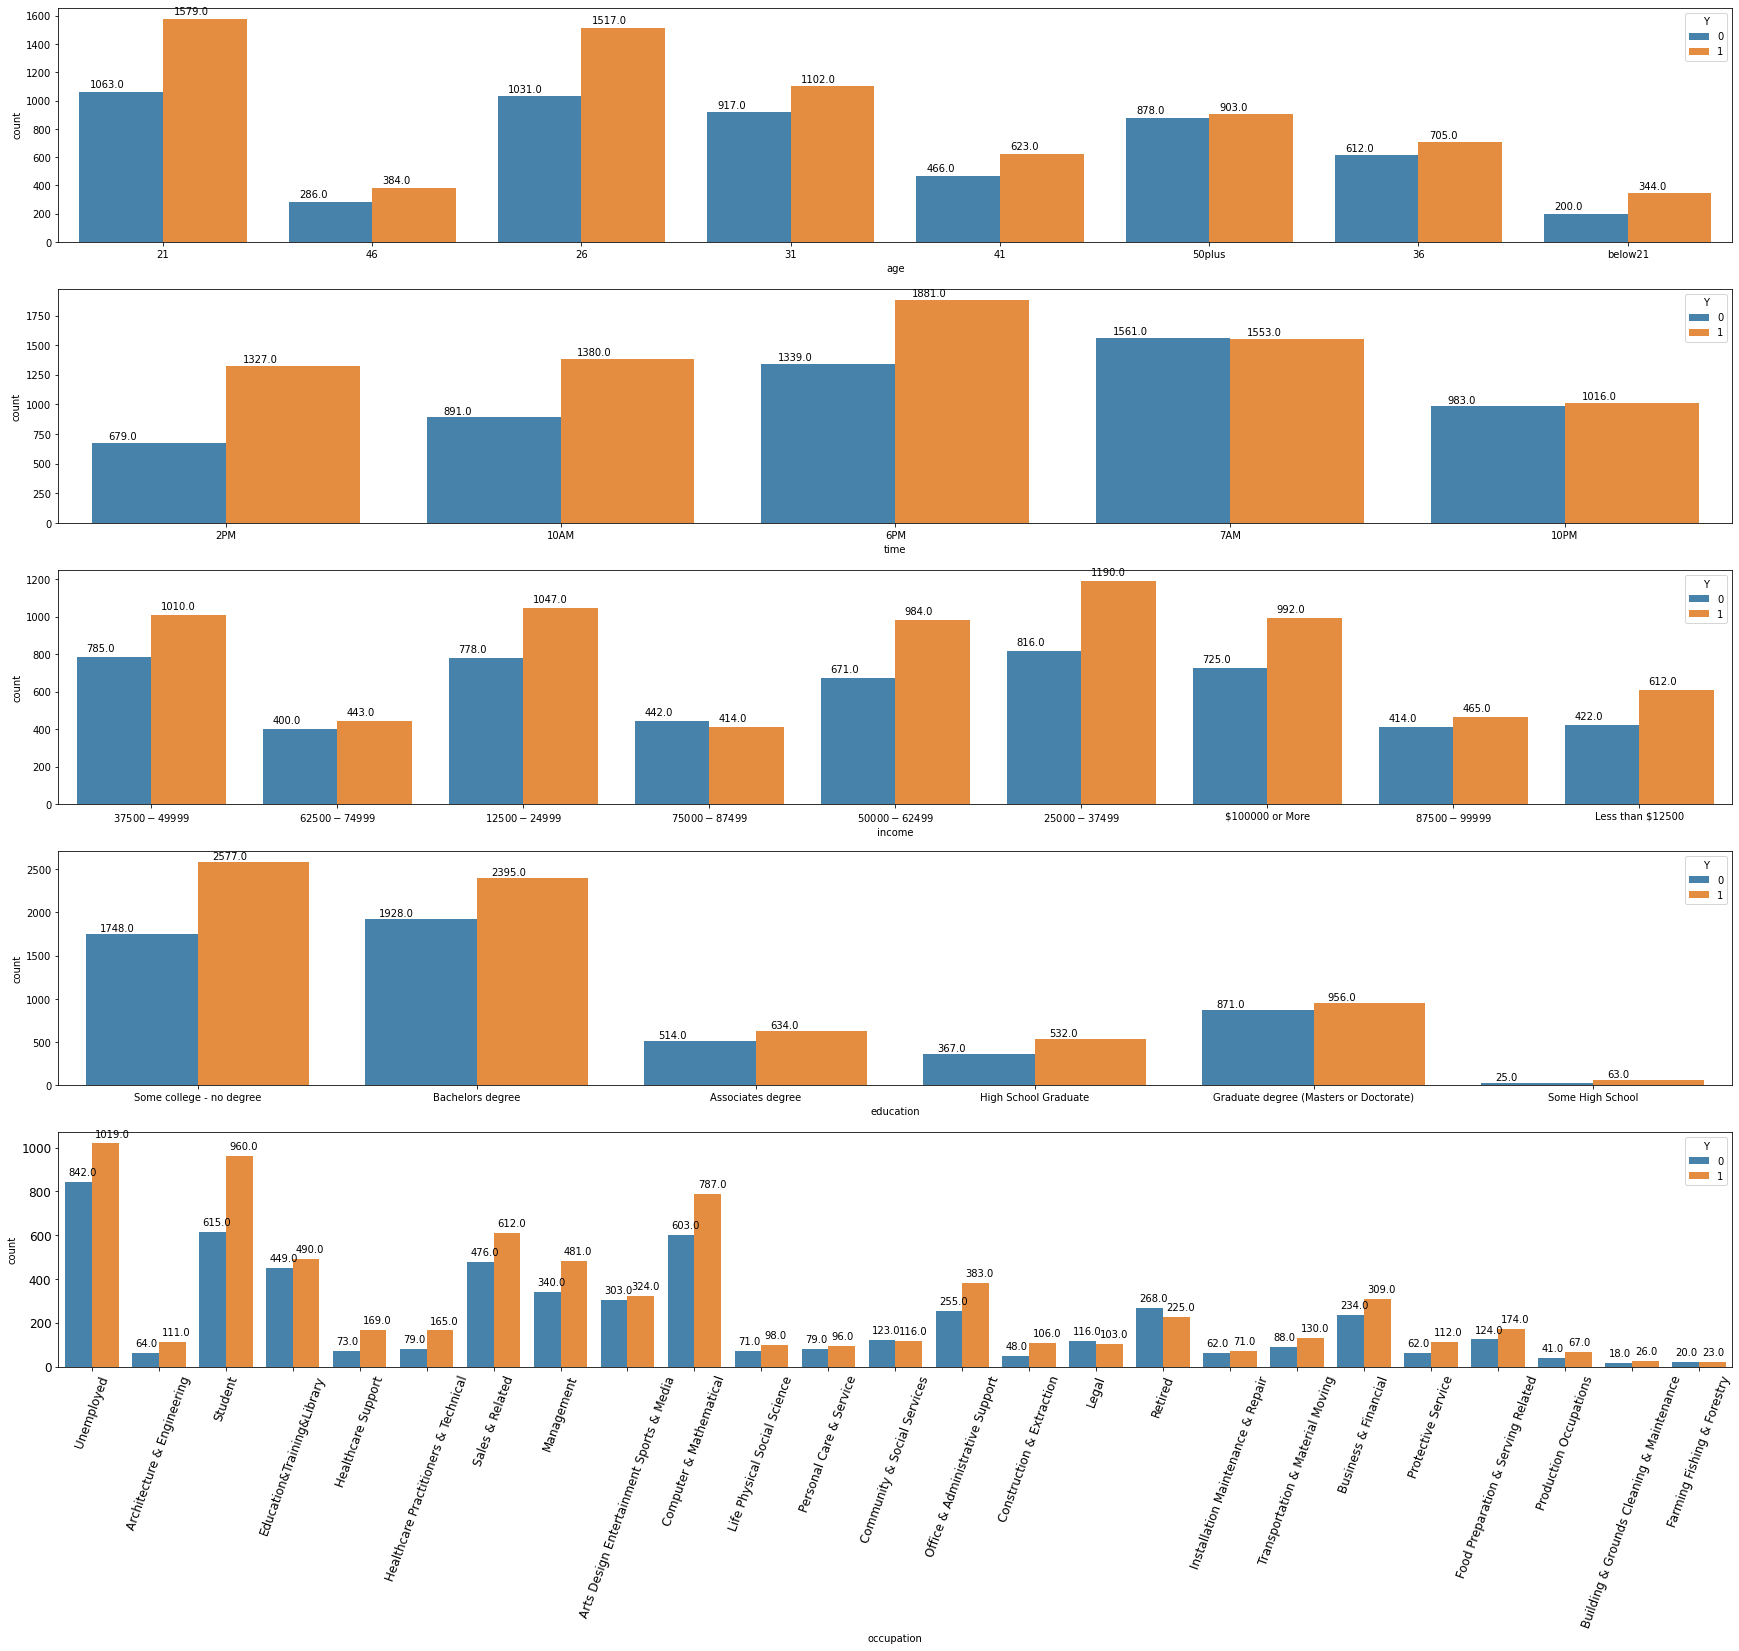

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(30,25)

a =sns.countplot(hue="Y",x="age", data=data,alpha=0.9, ax=axes[0])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a= sns.countplot(x="time",hue="Y", data=data, alpha=0.9, ax=axes[1])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a= sns.countplot(hue="Y",x="income", data=data, alpha=0.9, ax=axes[2])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))


a= sns.countplot(hue="Y",x="education", data=data, alpha=0.9, ax=axes[3])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))

a= sns.countplot(hue="Y",x="occupation", data=data, alpha=0.9, ax=axes[4])
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))
plt.tick_params(labelsize=12)
plt.xticks(rotation=70)

## **Feature engineering**

**One-Hot Encoding**
1. Destination
3. Occupation - but taking the classes of top frequency
4. maritalStatus -but taking the classes of top frequency
5. coupon
6. weather
7. passanger
8. destination


**Label Encoding**
2. Coffee_House
3. Bar
4. CarryAway
5. Restaurant20To50
6. Restaurantlessthan20 
7. income
8. Education
9. temperature

**Binary Encoding**
1. gender
2. expiration

**Date time Encoding**
1. Time
2. Expiration


In [21]:
print(data['direction_same'].value_counts())
print(data['direction_opp'].value_counts())
print(data['Y'].value_counts())
print(data['toCoupon_GEQ5min'].value_counts())
print(data['toCoupon_GEQ15min'].value_counts())
print(data['toCoupon_GEQ25min'].value_counts())
print(data['has_children'].value_counts())
print(data['temperature'].value_counts())

0    9892
1    2718
Name: direction_same, dtype: int64
1    9892
0    2718
Name: direction_opp, dtype: int64
1    7157
0    5453
Name: Y, dtype: int64
1    12610
Name: toCoupon_GEQ5min, dtype: int64
1    7059
0    5551
Name: toCoupon_GEQ15min, dtype: int64
0    11147
1     1463
Name: toCoupon_GEQ25min, dtype: int64
0    7383
1    5227
Name: has_children, dtype: int64
80    6475
55    3830
30    2305
Name: temperature, dtype: int64


In [22]:
# as the columns 'direction_opp','Y','has_children','toCoupon_GEQ25min','toCoupon_GEQ15min','toCoupon_GEQ5min' and 'direction_same' are categorrical variable having two classes we are converting then to object 
data['Y']=data['Y'].astype('category')
data['direction_opp']=data['direction_opp'].astype('category')
data['has_children']=data['has_children'].astype('category')
data['toCoupon_GEQ25min']=data['toCoupon_GEQ25min'].astype('category')
data['toCoupon_GEQ15min']=data['toCoupon_GEQ15min'].astype('category')
data['toCoupon_GEQ5min']=data['toCoupon_GEQ5min'].astype('category')
data['direction_same']=data['direction_same'].astype('category')
data['temperature']=data['temperature'].astype('category')

### One Hot Encoding

In [23]:
(((data['maritalStatus'].value_counts())/len(data))*100).cumsum()

Married partner       40.190325
Single                77.589215
Unmarried partner     94.916733
Divorced              98.969072
Widowed              100.000000
Name: maritalStatus, dtype: float64

In [24]:
data['maritalStatus'].replace({'Divorced':'others','Widowed':'others'},inplace=True)

In [25]:
(((data['occupation'].value_counts())/len(data))*100).cumsum()
data['occupation'].replace({'Farming Fishing & Forestry':'others','Building & Grounds Cleaning & Maintenance':'others','Production Occupations':'others','Installation Maintenance & Repair':'others','Construction & Extraction':'others','Life Physical Social Science':'others','Protective Service':'others','Personal Care & Service':'others','Architecture & Engineering':'others','Transportation & Material Moving':'others','Legal':'others','Community & Social Services':'others','Healthcare Support':'others','Healthcare Practitioners & Technical':'others'},inplace=True)

In [26]:
data['occupation'].replace({'Farming Fishing & Forestry':'others','Building & Grounds Cleaning & Maintenance':'others','Production Occupations':'others','Installation Maintenance & Repair':'others','Construction & Extraction':'others','Life Physical Social Science':'others','Protective Service':'others','Personal Care & Service':'others','Architecture & Engineering':'others','Transportation & Material Moving':'others','Legal':'others','Community & Social Services':'others','Healthcare Support':'others','Healthcare Practitioners & Technical':'others'},inplace=True)

In [27]:
data= pd.get_dummies(data,prefix=['destination','maritalStatus','coupon','occupation','weather','passanger'],columns=['destination','maritalStatus','coupon','occupation','weather','passanger'], drop_first=True)


In [28]:
pd.options.display.max_columns=None
data.head(2)

,temperature,time,expiration,gender,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,weather_Snowy,weather_Sunny,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,55,2PM,1d,Female,21,1,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,80,10AM,2h,Female,21,1,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


### Label Encoding


In [29]:
data['income'].replace({'Less than $12500':0,'$12500 - $24999':1,'$25000 - $37499':2,'$37500 - $49999':3,'$50000 - $62499':4,'$62500 - $74999':5,'$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8},inplace=True)

In [30]:
data['education'].replace({'Graduate degree (Masters or Doctorate)':5,'Bachelors degree':4,'Associates degree':3,'Some college - no degree':2,'High School Graduate':1,'Some High School':0},inplace=True)

In [31]:
data['temperature'].replace({80:2,55:1,30:0},inplace=True)

In [32]:
data['Bar']=data['Bar'].astype('category')
data['CoffeeHouse']=data['CoffeeHouse'].astype('category')
data['CarryAway']=data['CarryAway'].astype('category')
data['Restaurant20To50']=data['Restaurant20To50'].astype('category')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].astype('category')


data['Bar']=data['Bar'].cat.codes
data['CoffeeHouse']=data['CoffeeHouse'].cat.codes
data['CarryAway']=data['CarryAway'].cat.codes
data['Restaurant20To50']=data['Restaurant20To50'].cat.codes
data['RestaurantLessThan20']=data['RestaurantLessThan20'].cat.codes

data.head(2)

,temperature,time,expiration,gender,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,weather_Snowy,weather_Sunny,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,1,2PM,1d,Female,21,1,2,3,4,4,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2,10AM,2h,Female,21,1,2,3,4,4,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


### Binary Encoding


In [33]:
data['gender'].replace({'Female':0,'Male':1},inplace=True)

In [34]:
data['expiration'].replace({'1d':1,'2h':0},inplace=True)

### Datetime encoding

In [35]:
data['time'].value_counts()

6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: time, dtype: int64

In [36]:
data['time'].replace({'6PM':18,'7AM':7,'10AM':10,'2PM':14,'10PM':22},inplace=True)

In [37]:
data['has_children']=data['has_children'].astype('int64')
data['toCoupon_GEQ5min']=data['toCoupon_GEQ5min'].astype('int64')
data['toCoupon_GEQ15min']=data['toCoupon_GEQ15min'].astype('int64')
data['toCoupon_GEQ25min']=data['toCoupon_GEQ25min'].astype('int64')
data['direction_same']=data['direction_same'].astype('int64')
data['direction_opp']=data['direction_opp'].astype('int64')

In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Y'] = LE.fit_transform(data['Y'])

In [39]:
data['age']=data['age'].replace({'below21':0,'21':1,'26':2,'31':3,'36':4,'41':5,'46':6,'50plus':7})

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 44 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   temperature                                    12610 non-null  int64
 1   time                                           12610 non-null  int64
 2   expiration                                     12610 non-null  int64
 3   gender                                         12610 non-null  int64
 4   age                                            12610 non-null  int64
 5   has_children                                   12610 non-null  int64
 6   education                                      12610 non-null  int64
 7   income                                         12610 non-null  int64
 8   Bar                                            12610 non-null  int8 
 9   CoffeeHouse                                    12610 non-null  int8 
 10

# **CLUSTERING**

In [41]:
data1.head()
data1.drop(['toCoupon_GEQ5min'],axis=1,inplace=True)

ONE HOT ENCODING FOR CLUSTERING

In [42]:
print((((data1['maritalStatus'].value_counts())/len(data1))*100).cumsum())
data1['maritalStatus'].replace({'Divorced':'others','Widowed':'others'},inplace=True)

Married partner       40.190325
Single                77.589215
Unmarried partner     94.916733
others               100.000000
Name: maritalStatus, dtype: float64


In [43]:
print((((data1['occupation'].value_counts())/len(data1))*100).cumsum())
data1['occupation'].replace({'Farming Fishing & Forestry':'others','Building & Grounds Cleaning & Maintenance':'others','Production Occupations':'others','Installation Maintenance & Repair':'others','Construction & Extraction':'others','Life Physical Social Science':'others','Protective Service':'others','Personal Care & Service':'others','Architecture & Engineering':'others','Transportation & Material Moving':'others','Legal':'others','Community & Social Services':'others','Healthcare Support':'others','Healthcare Practitioners & Technical':'others'},inplace=True)

others                                       18.532910
Unemployed                                   33.291039
Student                                      45.781126
Computer & Mathematical                      56.804124
Sales & Related                              65.432197
Education&Training&Library                   72.878668
Management                                   79.389374
Office & Administrative Support              84.448850
Arts Design Entertainment Sports & Media     89.421094
Business & Financial                         93.727201
Retired                                      97.636796
Food Preparation & Serving Related          100.000000
Name: occupation, dtype: float64


In [44]:
data1= pd.get_dummies(data1,prefix=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],columns=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'], drop_first=False)


In [45]:
data1.shape

(12610, 103)

In [46]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(data1)
X = pd.DataFrame(num_norm, columns = data1.columns)
X.head(2)

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,has_children_0,has_children_1,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1,Y_0,Y_1
0,-0.586813,1.006205,-0.57265,0.860111,-0.594386,-0.293643,-0.304346,-0.324599,-0.35297,0.509524,-0.472946,1.514077,-1.027336,-0.468672,-0.434038,2.299161,-0.585592,-0.57265,-0.435457,-0.477835,-0.680226,-0.365772,1.880852,0.890778,-0.890778,0.974319,-0.974319,1.942395,-0.50322,-0.436616,-0.341498,-0.307446,-0.236884,-0.405544,-0.212333,-0.819738,-0.772927,2.1843,-0.23142,-1.188475,1.188475,-0.316476,-0.722261,-0.411623,-0.277066,-0.083831,1.384055,-0.228745,-0.212129,-0.351974,-0.283647,-0.155576,-0.263896,-0.230848,-0.201709,-0.307291,-0.377793,2.403316,-0.476959,-0.397019,-0.411359,-0.434941,2.454602,-0.388681,-0.267658,-0.269863,-0.273733,-0.298869,-0.4933,-0.304657,-0.168465,-0.612239,1.177284,-0.583028,-0.405279,-0.310219,-0.629525,1.811182,1.276645,-0.711991,-0.377382,-0.414517,-0.110458,-0.859274,1.596594,-0.336409,-0.459712,-0.132944,1.627815,-0.247526,-0.146231,-0.958969,-0.449807,1.12768,-1.12768,0.362279,-0.362279,0.524183,-0.524183,-0.524183,0.524183,-0.872875,0.872875
1,-0.586813,1.006205,-0.57265,-1.162641,1.682408,-0.293643,-0.304346,-0.324599,-0.35297,0.509524,-0.472946,-0.660469,0.973391,2.133687,-0.434038,-0.434941,-0.585592,-0.57265,-0.435457,-0.477835,1.470100,-0.365772,-0.531674,-1.122614,1.122614,0.974319,-0.974319,1.942395,-0.50322,-0.436616,-0.341498,-0.307446,-0.236884,-0.405544,-0.212333,-0.819738,-0.772927,2.1843,-0.23142,-1.188475,1.188475,-0.316476,-0.722261,-0.411623,-0.277066,-0.083831,1.384055,-0.228745,-0.212129,-0.351974,-0.283647,-0.155576,-0.263896,-0.230848,-0.201709,-0.307291,-0.377793,2.403316,-0.476959,-0.397019,-0.411359,-0.434941,2.454602,-0.388681,-0.267658,-0.269863,-0.273733,-0.298869,-0.4933,-0.304657,-0.168465,-0.612239,1.177284,-0.583028,-0.405279,-0.310219,-0.629525,1.811182,1.276645,-0.711991,-0.377382,-0.414517,-0.110458,-0.859274,1.596594,-0.336409,-0.459712,-0.132944,1.627815,-0.247526,-0.146231,-0.958969,-0.449807,1.12768,-1.12768,0.362279,-0.362279,0.524183,-0.524183,-0.524183,0.524183,1.145639,-1.145639


In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet
np.set_printoptions(suppress = True)
from sklearn.metrics import silhouette_score, silhouette_samples

ELBOW PLOT

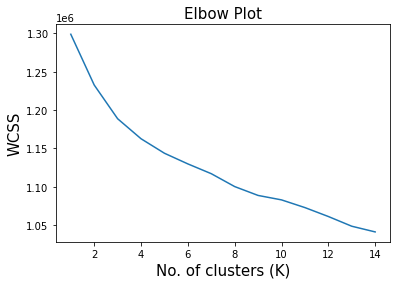

In [48]:
wcss  = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

Silhoutte Score

In [49]:
n_clusters = [2, 3, 4,5,6,7,8,9,10]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.06369564831921747)
For 3 clusters the silhouette score is 0.06172613005340751)
For 4 clusters the silhouette score is 0.048106060771617734)
For 5 clusters the silhouette score is 0.04594857208121583)
For 6 clusters the silhouette score is 0.04400196262558875)
For 7 clusters the silhouette score is 0.04492627050893587)
For 8 clusters the silhouette score is 0.048366547265623006)
For 9 clusters the silhouette score is 0.049421539773437925)
For 10 clusters the silhouette score is 0.04464644891302326)


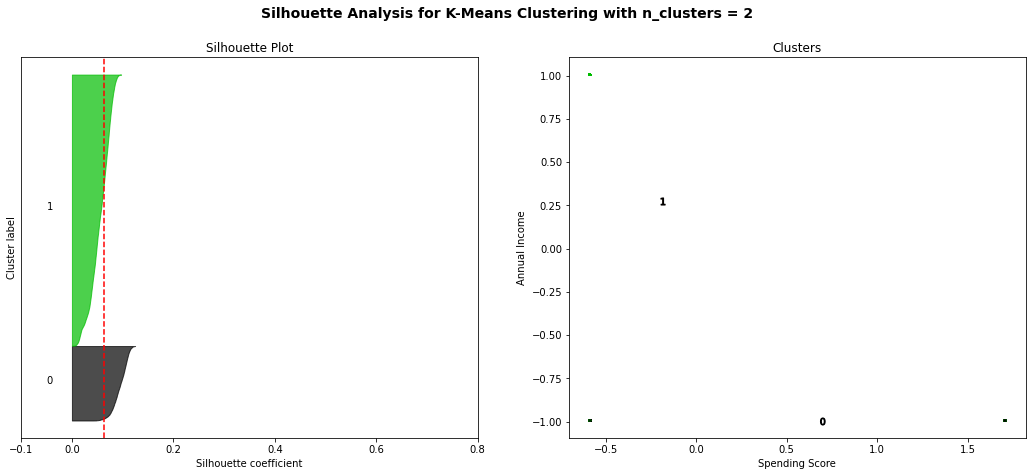

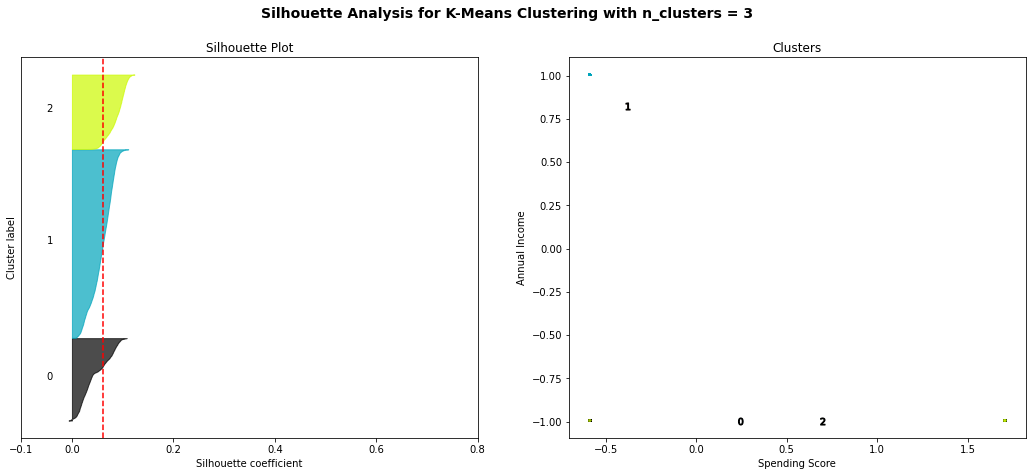

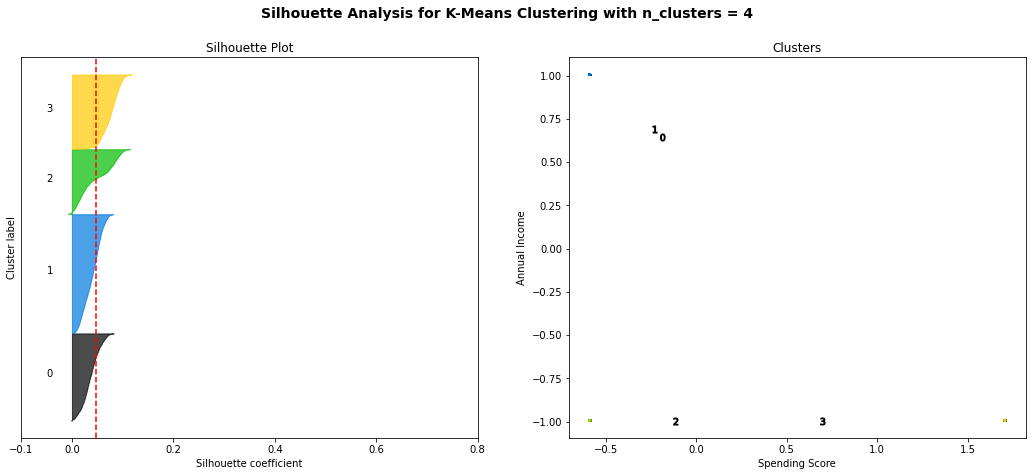

In [50]:
import matplotlib.cm as cm


# consider the number of clusters
n_clusters = [2, 3, 4]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [51]:
label3 = KMeans(n_clusters = 3, random_state = 10)
label2= KMeans(n_clusters = 2,random_state =10)
label3.fit(X)
label2.fit(X)
data1['Cluster1'] = label2.labels_
data1['Cluster2'] = label3.labels_
data1.head(5)

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,has_children_0,has_children_1,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1,Y_0,Y_1,Cluster1,Cluster2
0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,1
1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1


In [52]:
data1.Cluster1.value_counts()

1    9892
0    2718
Name: Cluster1, dtype: int64

In [53]:
data1.Cluster2.value_counts()

1    6884
0    3008
2    2718
Name: Cluster2, dtype: int64

The percentage of each cluster in cluster1:
 1    78.445678
0    21.554322
Name: Cluster1, dtype: float64
The percentage of each cluster in cluster1:
 1    54.591594
0    23.854084
2    21.554322
Name: Cluster2, dtype: float64


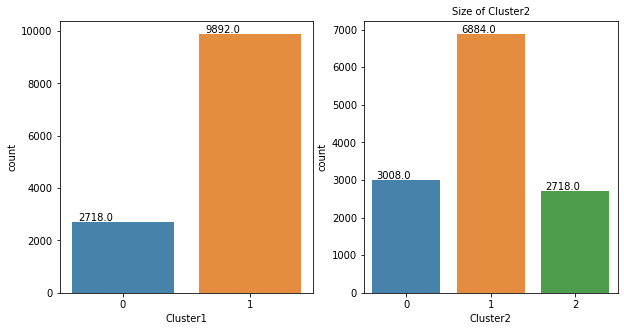

In [54]:
# use 'seaborn' library to plot a barplot for cluster size
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

a= sns.countplot(data= data1, x = 'Cluster1',alpha=0.9,ax=axes[0])
plt.title('Size of Cluster1', fontsize = 10)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))

a= sns.countplot(data= data1, x = 'Cluster2',alpha=0.9,ax=axes[1])
plt.title('Size of Cluster2', fontsize = 10)
for p in a.patches:
    a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+30))

print('The percentage of each cluster in cluster1:\n',(((data1['Cluster1'].value_counts())/len(data1))*100))
print('The percentage of each cluster in cluster1:\n',(((data1['Cluster2'].value_counts())/len(data1))*100))

# display the plot
plt.show()

CLUSTER PROFILING

In [55]:
data1_profiling=data1.groupby('Cluster1').mean()
cluster_frequency=data1["Cluster1"].value_counts().sort_index()
data1_profiling['Cluster1 Count']=cluster_frequency
data1_profiling

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,has_children_0,has_children_1,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Arts Design Entertainment Sports & Media,occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1,Y_0,Y_1,Cluster2,Cluster1 Count
Cluster1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.559235,0.000000,0.440765,0.931199,0.000000,0.018396,0.050405,0.105592,0.069536,0.824871,0.167035,0.192053,0.640912,0.000000,0.173657,0.00000,0.385578,0.440765,0.154525,0.291391,0.275570,0.094555,0.183959,0.527226,0.472774,0.517660,0.482340,0.217071,0.202723,0.166667,0.105224,0.075055,0.045254,0.133554,0.054452,0.376380,0.387417,0.182119,0.054084,0.615894,0.384106,0.087564,0.337380,0.150846,0.079102,0.00883,0.336277,0.043782,0.040471,0.104489,0.072112,0.025754,0.058499,0.052980,0.036424,0.087932,0.141648,0.161884,0.174025,0.129875,0.142384,0.159308,0.151214,0.117366,0.068433,0.065489,0.064753,0.101177,0.195732,0.084989,0.022075,0.286240,0.410964,0.236571,0.144592,0.092347,0.278882,0.247609,0.366814,0.350625,0.118469,0.150846,0.013245,0.430464,0.278882,0.096762,0.174025,0.019868,0.267476,0.062914,0.018764,0.467991,0.182855,0.726269,0.273731,1.000000,0.000000,0.0,1.0,1.0,0.0,0.418322,0.581678,2.000000,2718
1,0.172867,0.633441,0.193692,0.476850,0.332794,0.096138,0.094218,0.092499,0.122119,0.785382,0.187121,0.334412,0.478467,0.229579,0.154367,0.20279,0.219571,0.193692,0.160736,0.156894,0.327537,0.124444,0.230388,0.565912,0.434088,0.511727,0.488273,0.207440,0.201880,0.158310,0.104226,0.089466,0.055297,0.143348,0.040032,0.408916,0.370299,0.170845,0.049939,0.577133,0.422867,0.091994,0.344319,0.143247,0.069147,0.00647,0.344824,0.051355,0.043773,0.111808,0.075111,0.023049,0.066923,0.049939,0.039830,0.085827,0.120299,0.143651,0.188435,0.137889,0.145370,0.159017,0.139911,0.135059,0.066417,0.068540,0.071068,0.076729,0.195714,0.084917,0.029114,0.268904,0.421351,0.258391,0.140113,0.086535,0.285180,0.229782,0.383947,0.332491,0.126365,0.145471,0.011727,0.423170,0.282552,0.103013,0.174586,0.016680,0.275778,0.056308,0.021533,0.482107,0.164274,0.361605,0.638395,0.852103,0.147897,1.0,0.0,0.0,1.0,0.436312,0.563688,0.695916,9892


**Cluster 1 - Availing coupon drivers type**

Mostly the Female drivers who are travelling in the morning and in the evening to work without any passengers in a clear day prefer carryout or takeaway coupons having 1 day validation who often prefer visiting carryaway or visit the restaurant less than 20mts also they buy the coupon mostly when they are travelling in the same direction where the coupon is valid or they prefer to use thier coupon.

**General Characteristics**
1. They are single or married&having partners
2. they dont have children
3. income range b/w 12500 to 38000
4. age group ob/w 21to 26 and education is college

**Cluster 2 - Availing coupon drivers type**

Mostly the Female drivers who generally travel b/w 7 am to 6 pm  without any passengers in a clear day prefer coffee house coupons having 1 day validation who often prefer visiting coffehouse orhe restaurant less than 20mts also they buy the coupon mostly when they are travelling in the opposite direction to their home where the coupon is valid or they prefer to use thier coupon is 15 mts from the place of purchase.

**General Characteristics**
1. They are married&having partners
2. they dont have children
3. income range b/w 12500 to 38000
4. age group ob/w 21to 26 and education is college


**BUSINESS IMPLICATIONS**

We can concentrate more on cluster 1 drivers because they get their breakfast or dinner regularly while going to work or returning from work and the coupon will be more useful to them .So definetly more coupons will be bought by this kind of drivers

## Split the data into train and test


In [56]:
X = data.drop(["Y"], axis=1)

y = data["Y"]

X.head()

,temperature,time,expiration,gender,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_No Urgent Place,destination_Work,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_others,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),occupation_Business & Financial,occupation_Computer & Mathematical,occupation_Education&Training&Library,occupation_Food Preparation & Serving Related,occupation_Management,occupation_Office & Administrative Support,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Unemployed,occupation_others,weather_Snowy,weather_Sunny,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,1,14,1,0,1,1,2,3,4,4,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2,10,0,0,1,1,2,3,4,4,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,2,10,0,0,1,1,2,3,4,4,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,2,14,0,0,1,1,2,3,4,4,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
4,2,14,1,0,1,1,2,3,4,4,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [58]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (8827, 43)
X_test (3783, 43)
y_train (8827,)
y_test (3783,)


#### Scaling

In [59]:
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

### KNN


In [60]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()
knn.fit(X_train_sc,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)

In [62]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix


print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))

Train Accuracy is : 0.7934745666704429

Test Accuracy is : 0.6595294739624636

Train ROC-AUC score is : 0.8673648172863243

Test ROC-AUC score is : 0.7032125021937872

Confusion matrix for train set :  
 [[2777 1045]
 [ 778 4227]]

Confusion matrix for test set :  
 [[ 921  710]
 [ 578 1574]]


In [63]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3822
           1       0.80      0.84      0.82      5005

    accuracy                           0.79      8827
   macro avg       0.79      0.79      0.79      8827
weighted avg       0.79      0.79      0.79      8827



In [64]:
print('Classification report Test set :')
print(classification_report(y_test,Y_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1631
           1       0.69      0.73      0.71      2152

    accuracy                           0.66      3783
   macro avg       0.65      0.65      0.65      3783
weighted avg       0.66      0.66      0.66      3783



Hyperparameter Tuning

In [65]:
params = {'n_neighbors':[3,5,7,9,11],
         'weights':['uniform', 'distance'],'p':[1,2,3]}

In [66]:
from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1,n_jobs=1)
grid_knn.fit(X_train_sc,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 14.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [67]:
grid_knn.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [68]:
Grid_train_predict=grid_knn.predict(X_train_sc)
Grid_test_predict=grid_knn.predict(X_test_sc)

In [69]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Grid_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Grid_test_predict))

Train Accuracy is : 0.9987538234960915

Test Accuracy is : 0.6933650541897964

Train ROC-AUC score is : 0.9999968372809817

Test ROC-AUC score is : 0.7493226325902188

Confusion matrix for train set :  
 [[3822    0]
 [  11 4994]]

Confusion matrix for test set :  
 [[ 954  677]
 [ 483 1669]]


In [70]:
print('Classification report Train set :')
print(classification_report(y_train,Grid_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3822
           1       1.00      1.00      1.00      5005

    accuracy                           1.00      8827
   macro avg       1.00      1.00      1.00      8827
weighted avg       1.00      1.00      1.00      8827



In [71]:
print('Classification report Test set :')
print(classification_report(y_test,Grid_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1631
           1       0.71      0.78      0.74      2152

    accuracy                           0.69      3783
   macro avg       0.69      0.68      0.68      3783
weighted avg       0.69      0.69      0.69      3783



In [72]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#LR Test performance metrics
Knn_test_recall=recall_score(y_test, Grid_test_predict,average='macro')
Knn_test_precision=precision_score(y_test, Grid_test_predict,average='macro')
Knn_test_f1=f1_score(y_test, Grid_test_predict,average='macro')
Knn_test_accuracy=accuracy_score(y_test, Grid_test_predict)

AUC and ROC Test
AUC: 0.703


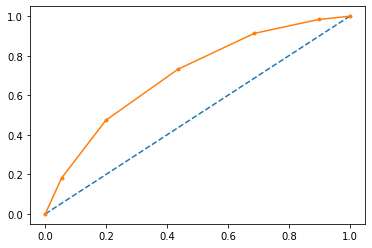

In [73]:
# AUC and ROC for the test data
print('AUC and ROC Test')
# predict probabilities
probs = knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
knn_test_fpr, knn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.')
# show the plot
plt.show()

#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
LR = LogisticRegression(solver='newton-cg',penalty='none')


In [76]:
LR.fit(X_train_sc,y_train)

ytest_predict= LR.predict(X_test_sc)

Model Comparison

In [77]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [78]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#LR Test performance metrics
LR_test_recall=recall_score(y_test, ytest_predict,average='macro')
LR_test_precision=precision_score(y_test, ytest_predict,average='macro')
LR_test_f1=f1_score(y_test, ytest_predict,average='macro')
LR_test_accuracy=accuracy_score(y_test, ytest_predict)

In [79]:
print(metrics.confusion_matrix(y_test, ytest_predict))

[[ 929  702]
 [ 480 1672]]


In [80]:
print('LR Model')
tn, fp, fn, tp = metrics.confusion_matrix(y_test, ytest_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

LR Model
True Negative: 929 
False Positives: 702 
False Negatives: 480 
True Positives: 1672 




In [81]:
print('LR Model')
print(metrics.classification_report(y_test, ytest_predict),'\n')


LR Model
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1631
           1       0.70      0.78      0.74      2152

    accuracy                           0.69      3783
   macro avg       0.68      0.67      0.68      3783
weighted avg       0.68      0.69      0.68      3783
 



AUC and ROC Test
AUC: 0.735


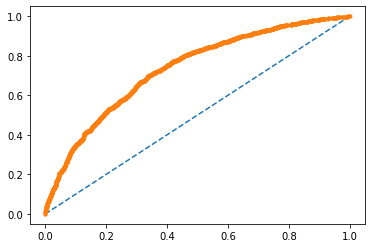

In [82]:
# AUC and ROC for the test data
print('AUC and ROC Test')
# predict probabilities
probs = LR.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LR_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LR_test_fpr, LR_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr, marker='.')
# show the plot
plt.show()


Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train,y_train)

In [84]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search2= GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5,n_jobs=-1,verbose=1)

In [85]:
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [86]:
grid_search2.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [87]:
rfcl_model = RandomForestClassifier(max_depth= 10,min_samples_leaf=50,min_samples_split=150,max_features=6,n_estimators=301)
rfcl_model.fit(X_train,y_train)
ytrain_predict = rfcl_model.predict(X_train)
ytest_predict= rfcl_model.predict(X_test)

In [88]:
## Accuracy score train and test)
print(rfcl_model.score(X_test,y_test))
print(rfcl_model.score(X_train,y_train))

0.7044673539518901
0.7137192704203014


In [89]:
## Confusion Matrix
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.confusion_matrix(y_train, ytrain_predict))

[[ 864  767]
 [ 351 1801]]
[[2099 1723]
 [ 804 4201]]


In [90]:
## Classificationn report train
print(metrics.classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62      3822
           1       0.71      0.84      0.77      5005

    accuracy                           0.71      8827
   macro avg       0.72      0.69      0.70      8827
weighted avg       0.72      0.71      0.71      8827



In [91]:
## Classification report test
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      1631
           1       0.70      0.84      0.76      2152

    accuracy                           0.70      3783
   macro avg       0.71      0.68      0.69      3783
weighted avg       0.71      0.70      0.70      3783



In [92]:
#RNN train perormance metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
rnn_train_precision=precision_score(y_train, ytrain_predict,average='macro')
rnn_train_recall=recall_score(y_train, ytrain_predict,average='macro')
rnn_train_f1=f1_score(y_train, ytrain_predict,average='macro')
rnn_train_accuracy=accuracy_score(y_train, ytrain_predict)
#RNN Test performance metrics
rnn_test_recall=recall_score(y_test, ytest_predict,average='macro')
rnn_test_precision=precision_score(y_test, ytest_predict,average='macro')
rnn_test_f1=f1_score(y_test, ytest_predict,average='macro')
rnn_test_accuracy=accuracy_score(y_test, ytest_predict)

AUC and ROC Test
AUC: 0.762


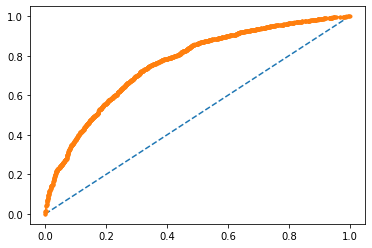

In [93]:
# AUC and ROC for the test data
print('AUC and ROC Test')
# predict probabilities
probs = rfcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rnn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rnn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rnn_test_fpr, rnn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rnn_test_fpr, rnn_test_tpr, marker='.')
# show the plot
plt.show()

**MODEL COMPARISOM**

In [94]:
models=[knn,LR,rfcl_model]
models_names={knn:'KNN',LR:'Logistic regression',rfcl_model:'RandomForestClassifier'}
for i in range(0, len(models)):
    if models[i]==LR:
      print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test_sc)),2))  )
    elif models[i]==knn:
      print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test_sc)),2))  )
    else:
      print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test)),2))  ) 

Accuracy Score for Test set for KNN is 0.66
Accuracy Score for Test set for Logistic regression is 0.69
Accuracy Score for Test set for RandomForestClassifier is 0.7


Confusion Matrix Test


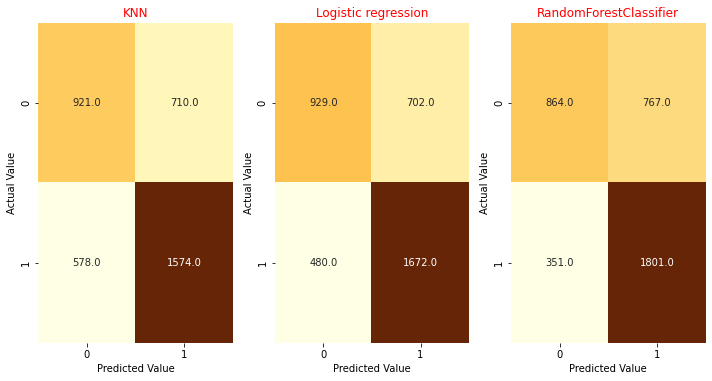

In [95]:
print('Confusion Matrix Test')
models=[knn,LR,rfcl_model]
models_names={knn:'KNN',LR:'Logistic regression',rfcl_model:'RandomForestClassifier'}
fig=plt.figure(figsize=(10,10))
for i in range(0, len(models)):
    ax=fig.add_subplot(2,3,i+1)
    if models[i]==LR:
      sns.heatmap((metrics.confusion_matrix(y_test,models[i].predict(X_test_sc))),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
      ax.set_title(models_names[models[i]],color='Red')
      plt.ylabel('Actual Value')
      plt.xlabel('Predicted Value')
    elif models[i]==rfcl_model :
      sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
      ax.set_title(models_names[models[i]],color='Red')
      plt.ylabel('Actual Value')
      plt.xlabel('Predicted Value')
    else:
      sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test_sc)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
      ax.set_title(models_names[models[i]],color='Red')
      plt.ylabel('Actual Value')
      plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()

In [96]:
index=['Accuracy','AUC','Precision','Recall','F1 Score']
data=pd.DataFrame({'LRTest':[LR_test_accuracy,LR_test_auc,LR_test_precision,LR_test_recall,LR_test_f1],
                  'RNN Test':[rnn_test_accuracy,rnn_test_auc,rnn_test_precision,rnn_test_recall,rnn_test_f1],
                  'KNN Test':[Knn_test_accuracy,knn_test_auc,Knn_test_precision,Knn_test_recall,Knn_test_f1]},index=index)
round(data,2)

,LRTest,RNN Test,KNN Test
Accuracy,0.69,0.70,0.69
AUC,0.73,0.76,0.70
Precision,0.68,0.71,0.69
Recall,0.67,0.68,0.68
F1 Score,0.68,0.69,0.68


AUC and ROC Test


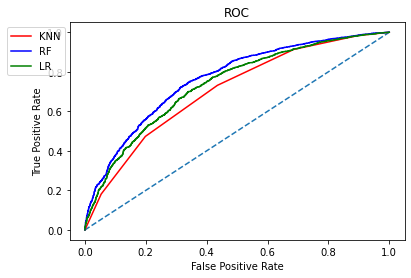

In [97]:
print('AUC and ROC Test')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_test_fpr,knn_test_tpr,color='red',label='KNN')
plt.plot(rnn_test_fpr,rnn_test_tpr,color='blue',label='RF')
plt.plot(LR_test_fpr,LR_test_tpr,color='green',label='LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.),loc='best')